<a href="https://colab.research.google.com/github/Epsita-R/Epsita/blob/main/2348517_CIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset
data = pd.read_csv('/content/2015.csv')

# displaying first few rows of the dataset
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
# data structure
print("Shape of data: ", data.shape, "\n")
data.describe()

Shape of data:  (158, 12) 



,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
# checking for missing values
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
# Binning

# Define bin edges and labels
bin_edges = [0, 5, 7, 10]
bin_labels = ['Low Happiness', 'Medium Happiness', 'High Happiness']

# Add a new column with happiness categories
data['Happiness Category'] = pd.cut(data['Happiness Score'], bins=bin_edges, labels=bin_labels)
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Category
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High Happiness
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High Happiness
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High Happiness
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High Happiness
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High Happiness


In [ ]:
# One-hot encoding
from sklearn.preprocessing import LabelEncoder
data_encoded = pd.get_dummies(data, columns=['Region'])
data_encoded.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Region_0,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,0,0,0,0,0,0,0,0,0,1
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,0,0,0,0,0,0,0,0,0,1
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,0,0,0,0,0,0,0,0,0,1
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,0,0,0,0,0,0,0,0,0,1
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data["Economy (GDP per Capita) Min-Max"] = min_max_scaler.fit_transform(data[["Economy (GDP per Capita)"]])
print(data)


In [ ]:
# Z-score Normalization
from sklearn.preprocessing import StandardScaler
z_scores = (data['Economy (GDP per Capita)'] - data['Economy (GDP per Capita)'].mean()) / data['Economy (GDP per Capita)'].std()
outliers = data[abs(z_scores) > 3]
scaler = StandardScaler()
data['Economy (GDP per Capita) Z-score'] = scaler.fit_transform(data[['Economy (GDP per Capita)']])
print(data)
print("Outliers:")
print(outliers)


In [ ]:
# Chi-square test


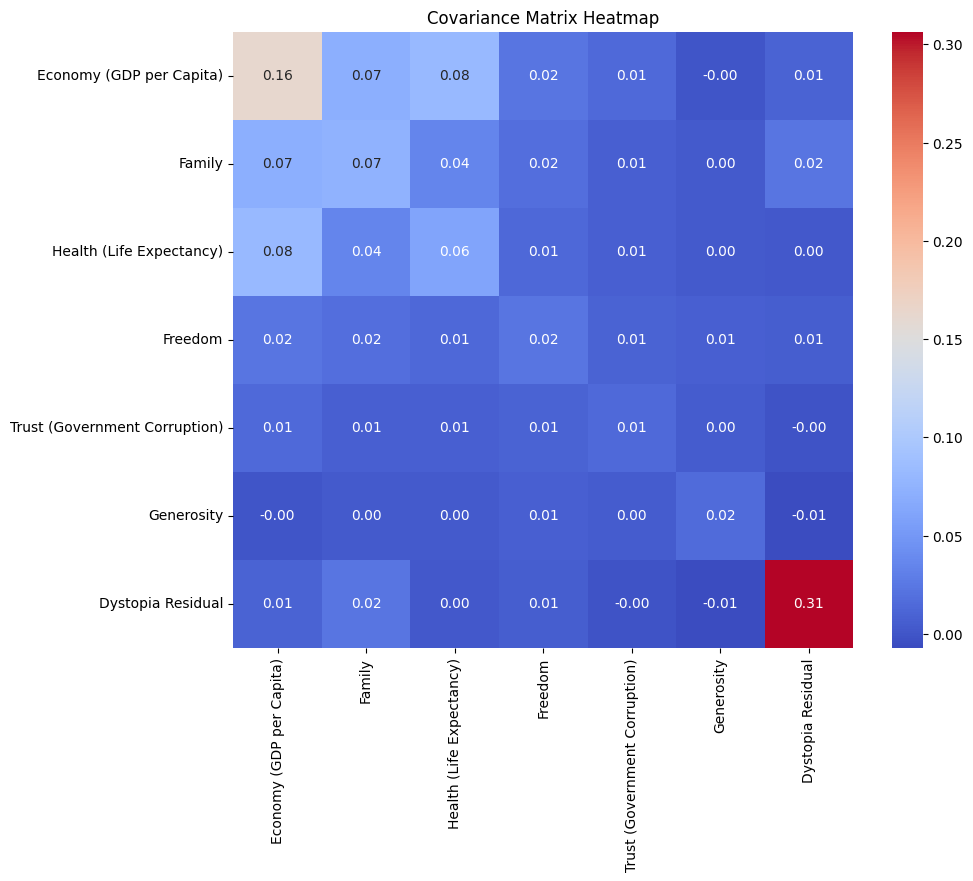

In [ ]:
# Covariance Matrix
# Select the numerical columns for covariance calculation
selected_columns = [
    "Economy (GDP per Capita)",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Trust (Government Corruption)",
    "Generosity",
    "Dystopia Residual"
]

# Calculate the covariance matrix
covariance_matrix = data[selected_columns].cov()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.show()


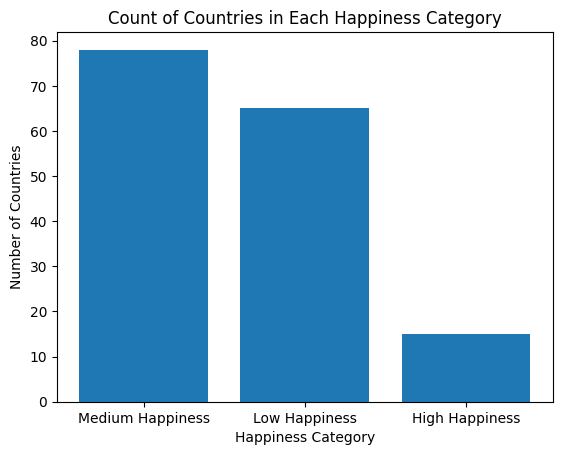

In [ ]:
# Visualization

# bar chart
category_counts = data['Happiness Category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Happiness Category')
plt.ylabel('Number of Countries')
plt.title('Count of Countries in Each Happiness Category')
plt.show()


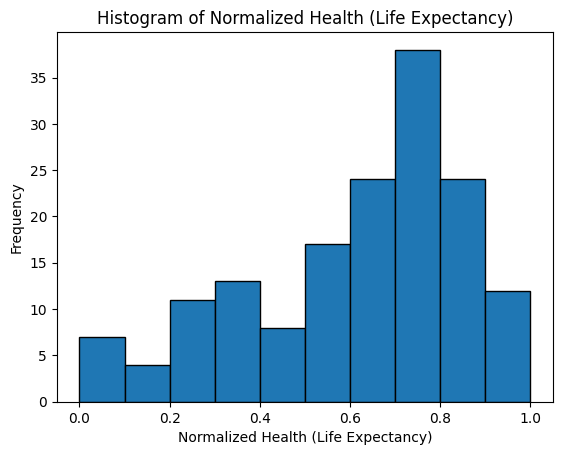

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the 'Health (Life Expectancy)' feature
scaler = MinMaxScaler()
data['Health (Life Expectancy)'] = scaler.fit_transform(data[['Health (Life Expectancy)']])

# Create a histogram
plt.hist(data['Health (Life Expectancy)'], bins=10, edgecolor='black')
plt.xlabel('Normalized Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Health (Life Expectancy)')
plt.show()


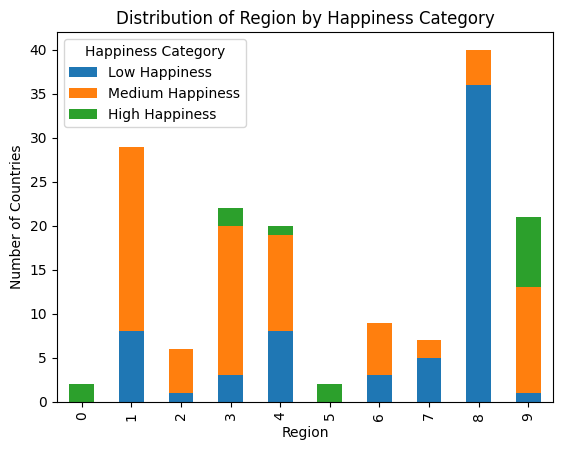

In [ ]:
# Group the data by 'Region' and 'Happiness Category' and count the occurrences
grouped = data.groupby(['Region', 'Happiness Category']).size().unstack()

# Create a stacked bar chart
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.title('Distribution of Region by Happiness Category')
plt.legend(title='Happiness Category')
plt.show()
